# Serial effects

In [80]:
#import the libraries
import os
#os.chdir('/home/david/Dropbox/KAROLINSKA/task/POSITIONS/L3_d0,2&7_rad8_resp_same')
os.chdir('C:\\Users\\David\\Dropbox\\KAROLINSKA\\task\\POSITIONS\\L3_d0,2&7_rad8_resp_same')
save_path= 'C:\\Users\\David\\Dropbox\\KAROLINSKA\\task\\POSITIONS\\L3_d0,2&7_rad8_resp_same'

%run "C:\\Users\\David\\Dropbox\\KAROLINSKA\\task\\POSITIONS\\L3_d0,2&7_rad8_resp_same\\Funciones.ipynb"

# os.chdir('/home/david/Dropbox/KAROLINSKA/task/POSITIONS/L3_d0,2&7_rad8_resp_same')
# %run 'Funciones.ipynb'
from numpy import loadtxt, shape, array, zeros, delete, argsort, mean, std, unique
import itertools
from itertools import chain
import matplotlib.pyplot as plt
import pickle
from pickle import *
import pandas as pd
import statsmodels.formula.api as sm
from scipy.stats import norm, ttest_1samp
import seaborn as sns

### Load the data

In [102]:
#go to the path where we have the files
#os.chdir('/home/david/Desktop/Psychophysics/results')
os.chdir('C:\\Users\\David\\Desktop\\KI_Desktop\\Psychophysics\\results')

In [103]:
files=['TH_2_beh_.txt', 'TH_3_beh_.txt', 'TH_4_beh_.txt', 'TH_5_beh_.txt', 'TH_6_beh_.txt', 'TH_7_beh_.txt',
       'AZ_1_beh_.txt', 'AZ_2_beh_.txt', 'AZ_3_beh_.txt', 'AZ_4_beh_.txt', 'AZ_5_beh_.txt', 'AZ_6_beh_.txt', 'AZ_7_beh_.txt',
       'ER_1_beh_.txt', 'ER_2_beh_.txt', 'ER_3_beh_.txt', 'ER_4_beh_.txt', 'ER_5_beh_.txt', 'ER_6_beh_.txt', 'ER_7_beh_.txt', 
       'AN_1_beh_.txt', 'AN_2_beh_.txt', 'AN_3_beh_.txt', 'AN_4_beh_.txt', 'AN_5_beh_.txt', 'AN_6_beh_.txt', 'AN_7_beh_.txt',
       'HL_1_beh_.txt', 'HL_2_beh_.txt', 'HL_3_beh_.txt', 'HL_4_beh_.txt', 'HL_5_beh_.txt', 'HL_6_beh_.txt', 'HL_7_beh_.txt',
       'LM_1_beh_.txt', 'LM_2_beh_.txt', 'LM_3_beh_.txt', 'LM_4_beh_.txt', 'LM_5_beh_.txt', 'LM_6_beh_.txt', 'LM_7_beh_.txt',
       'MI_1_beh_.txt', 'MI_2_beh_.txt', 'MI_3_beh_.txt', 'MI_4_beh_.txt', 'MI_5_beh_.txt', 'MI_6_beh_.txt', 'MI_7_beh_.txt',
       'TE_1_beh_.txt', 'TE_2_beh_.txt', 'TE_3_beh_.txt', 'TE_4_beh_.txt', 'TE_5_beh_.txt', 'TE_6_beh_.txt', 'TE_7_beh_.txt',
       'LI_1_beh_.txt', 'LI_2_beh_.txt', 'LI_3_beh_.txt', 'LI_4_beh_.txt', 'LI_5_beh_.txt', 'LI_6_beh_.txt', 'LI_7_beh_.txt',
       'FL_1_beh_.txt', 'FL_2_beh_.txt', 'FL_3_beh_.txt', 'FL_4_beh_.txt', 'FL_5_beh_.txt', 'FL_6_beh_.txt', 'FL_7_beh_.txt',
       'YH_1_beh_.txt', 'YH_2_beh_.txt', 'YH_3_beh_.txt', 'YH_4_beh_.txt', 'YH_5_beh_.txt', 'YH_6_beh_.txt', 'YH_7_beh_.txt',
       
       'AR_1_beh_.txt', 'AR_2_beh_.txt', 'AR_3_beh_.txt', 'AR_4_beh_.txt', 'AR_5_beh_.txt', 'AR_6_beh_.txt', 'AR_7_beh_.txt',
       'SW_1_beh_.txt', 'SW_2_beh_.txt', 'SW_3_beh_.txt', 'SW_4_beh_.txt', 'SW_5_beh_.txt', 'SW_6_beh_.txt', 'SW_7_beh_.txt',
       'HM_1_beh_.txt', 'HM_2_beh_.txt', 'HM_3_beh_.txt', 'HM_4_beh_.txt', 'HM_5_beh_.txt', 'HM_6_beh_.txt', 'HM_7_beh_.txt',
       'HT_1_beh_.txt', 'HT_2_beh_.txt', 'HT_3_beh_.txt', 'HT_4_beh_.txt', 'HT_5_beh_.txt', 'HT_6_beh_.txt', 'HT_7_beh_.txt',
       'FE_1_beh_.txt', 'FE_2_beh_.txt', 'FE_3_beh_.txt', 'FE_4_beh_.txt', 'FE_5_beh_.txt', 'FE_6_beh_.txt', 'FE_7_beh_.txt',
       'LA_1_beh_.txt', 'LA_2_beh_.txt', 'LA_3_beh_.txt', 'LA_4_beh_.txt', 'LA_5_beh_.txt', 'LA_6_beh_.txt', 'LA_7_beh_.txt',
       'ML_1_beh_.txt', 'ML_2_beh_.txt', 'ML_3_beh_.txt', 'ML_4_beh_.txt', 'ML_5_beh_.txt', 'ML_6_beh_.txt', 'ML_7_beh_.txt',
       'MH_1_beh_.txt', 'MH_2_beh_.txt', 'MH_3_beh_.txt', 'MH_4_beh_.txt', 'MH_5_beh_.txt', 'MH_6_beh_.txt', 'MH_7_beh_.txt',
       'SR_1_beh_.txt', 'SR_2_beh_.txt', 'SR_3_beh_.txt', 'SR_4_beh_.txt', 'SR_5_beh_.txt', 'SR_6_beh_.txt', 'SR_7_beh_.txt',
       'SN_1_beh_.txt', 'SN_2_beh_.txt', 'SN_3_beh_.txt', 'SN_4_beh_.txt', 'SN_5_beh_.txt', 'SN_6_beh_.txt', 'SN_7_beh_.txt']


#
data= open('TH_1_beh_.txt',"r")
data = data.readlines()
del(data[0])
del(data[-1])
data=loadtxt(data)
subject_column=zeros((len(data), 1))
session_column=zeros((len(data), 1))
index=subject_number('TH')

for j in range(0, len(data)):
    subject_column[j] = index
    session_column[j] = int('1')

data=numpy.hstack((data, subject_column, session_column)) 


DATA=data

for i in range(0, len(files)):
    data= open(files[i],"r")
    data = data.readlines()
    del(data[0])
    del(data[-1])
    data=loadtxt(data)
    subject_column=zeros((len(data), 1))
    session_column=zeros((len(data), 1))
    index=subject_number(files[i][0:2])
    #index=subject_number(files[i].split('/')[2][:4])
    
    for j in range(0, len(data)):
        subject_column[j] = index
        session_column[j] = int(files[i][3])
        #session_column[j] = int(files[i].split('/')[2].split('_')[2])
    
    data=numpy.hstack((data, subject_column, session_column)) 
    
    DATA=numpy.vstack((DATA, data))



data=DATA
np.shape(data)

(5231, 38)

In [134]:
D = pd.DataFrame(data)

#Indices_columns
TYPE=0 
delay1=1
delay2=2
A_T=3
A_NT1=4
A_NT2=5
A_dist=6
A_NT1_dist=7
A_NT2_dist=8
distance_T_dist=9
cue=10
order=11
orient=12
horiz_vertical=13
A_R=14
A_err=15
Abs_angle_error=16
Error_interference=17
A_DC=18 
A_DC_dist=19
Q_DC=20
A_DF=21
A_DF_dist=22
Q_DF=23
A_DVF=24
Q_DVF=25
A_DVF_dist=26
Q_DVF_dist=27
trial_time=28
time_to_fixate=29
disp_time=30
presentation_att_cue_time=31
presentation_target_time=32
presentation_dist_time=33
presentation_probe_time=34
R_T=35
subject_label=36
subj_session=37




df = pd.DataFrame({"type": D.loc[:,TYPE], 'delay':D.loc[:, delay1], 'delay2':D.loc[:, delay2], 'A_T':D.loc[:, A_T],
                   'A_NT1':D.loc[:, A_NT1], 'A_NT2':D.loc[:, A_NT2], 'A_dist':D.loc[:, A_dist], "A_NT1_dist": D.loc[:, A_NT1_dist],
                   "A_NT2_dist": D.loc[:, A_NT2_dist], "distance": D.loc[:, distance_T_dist], "cue_resp": D.loc[:, cue],
                   "order": D.loc[:, order], "orient": D.loc[:, orient], "horiz_vertical": D.loc[:, horiz_vertical],
                   'A_res':D.loc[:, A_R], 'A_err':D.loc[:, A_err],"A_err_abs": D.loc[:, Abs_angle_error],
                   "A_err_int_theoretical": D.loc[:, Error_interference], "A_DC": D.loc[:, A_DC], "A_DC_dis": D.loc[:, A_DC_dist],
                   "Q_DC": D.loc[:, Q_DC], "A_DF": D.loc[:, A_DF], "A_DF_dist": D.loc[:, A_DF_dist], "Q_DF": D.loc[:, Q_DF],
                   "A_DVF": D.loc[:, A_DVF], "Q_DVF": D.loc[:, Q_DVF], "A_DVF_dist": D.loc[:, A_DVF_dist], "Q_DVF_dist": D.loc[:, Q_DVF_dist],
                   "trial_time":D.loc[:,trial_time], "time_to_fixate":D.loc[:,time_to_fixate], "disp_time":D.loc[:, disp_time],
                   "att_cue_time":D.loc[:, presentation_att_cue_time], "target_time":D.loc[:, presentation_target_time],
                   "dist_time":D.loc[:, presentation_dist_time], "probe_time":D.loc[:, presentation_probe_time], "RT":D.loc[:, R_T],
                   "subject": D.loc[:, subject_label], "session": D.loc[:, subj_session]})





#df['A_err_theoretical'] = df['A_err'].copy()
np.shape(df)

(5231, 38)

In [135]:
(df.loc[df['order']==1, 'target_time'] + df.loc[df['order']==1, 'time_to_fixate'] ).mean()

4.104699856218549

### Add a colum with previous response in the order 1 trials

In [136]:

df_prev = []

for subj in df.subject.unique():
    df_subject = df.groupby('subject').get_group(subj)
    sessions_s = df_subject.session.unique()
    for session in sessions_s:
        df_subject_session = df_subject.groupby('session').get_group(session)
        indexes = df_subject_session.loc[df_subject_session['order']==1].index
        if indexes[0] == df_subject_session.index[0]:
            indexes = indexes[1:]
            
        #
        indexes_previous = indexes-1
        prev_response = df_subject_session.loc[indexes_previous, 'A_res'].values
        df_subject_sess_data = df_subject_session.loc[indexes]
        df_subject_sess_data['prev_response'] = prev_response
        #
        df_prev.append(df_subject_sess_data)


####
####
df_prev = pd.concat(df_prev)
df = df_prev[['A_T', 'A_res', 'prev_response', 'order', 'delay', 'subject', 'target_time', 'time_to_fixate' ]]
len(df)

2704

In [137]:
df['reponse_target_time'] = df['target_time'] + df['time_to_fixate']
df = df[['A_T', 'A_res', 'prev_response', 'order', 'delay', 'subject', 'reponse_target_time']]
df

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,A_T,A_res,prev_response,order,delay,subject,reponse_target_time
1,290.0,290.0,149.0,1.0,1.0,1.0,1.642
3,315.0,302.0,51.0,1.0,7.0,1.0,1.644
4,201.0,204.0,302.0,1.0,0.0,1.0,1.649
6,131.0,147.0,148.0,1.0,1.0,1.0,1.649
11,304.0,325.0,59.0,1.0,0.0,1.0,1.650
16,126.0,208.0,207.0,1.0,7.0,1.0,1.652
22,118.0,123.0,38.0,1.0,0.0,1.0,1.650
23,326.0,320.0,123.0,1.0,1.0,1.0,1.644
26,298.0,270.0,235.0,1.0,1.0,1.0,1.649
29,152.0,155.0,213.0,1.0,7.0,1.0,1.648


### Remove wrong and outliers

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
Outliers in 1 = 8
Outliers in 2 = 7
Outliers in 3 = 7
Outliers in 4 = 6
Outliers in 5 = 7
Outliers in 6 = 8
Outliers in 7 = 10
Outliers in 8 = 7
Outliers in 9 = 8
Outliers in 10 = 8
Outliers in 11 = 7
Outliers in 12 = 8
Outliers in 13 = 7
Outliers in 14 = 8
Outliers in 15 = 7
Outliers in 16 = 8
Outliers in 17 = 7
Outliers in 18 = 8
Outliers in 19 = 7
Outliers in 20 = 6
Outliers in 21 = 6
Number of trials: 2433


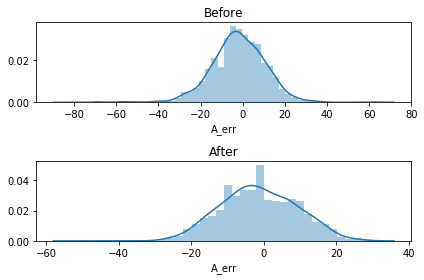

NormaltestResult(statistic=8.01261076263022, pvalue=0.018200515132523857)

In [138]:
df['A_err'] = df['A_T']-df['A_res']
df['A_err_abs'] = abs(df['A_err'])

# wrong (error bigger than 90)
df = df.loc[df['A_err_abs']<90]
df = df.reset_index()

# wrong (error bigger than 90)
df = df.loc[df['reponse_target_time']<10]
df = df.reset_index()


plt.figure()
plt.subplot(2,1,1)
plt.title('Before')
g=sns.distplot(df['A_err'])


#Remove outliers
frames=[]
list_subjects = [int(df.subject.unique()[i]) for i in range(0, len(df.subject.unique()))]
print(list_subjects)


for Subject in list_subjects:
    sub_group=df.groupby('subject').get_group(Subject)
    interval = sub_group.quantile([0.95]).unstack(level=1)
    interval = interval['A_err_abs']
    #removed_out = sub_group.loc[(sub_group['A_err_abs']>interval.iloc[0]) & (sub_group['A_err_abs']<interval.iloc[1])] 
    keep = sub_group.loc[sub_group['A_err_abs']<interval.iloc[0]] 
    frames.append(  keep   )
    
    #Print the result
    before_outliers=len(sub_group)
    after_outliers=len(keep)
    print('Outliers in ' + str(Subject) + ' = ' +str(before_outliers-after_outliers)  )  


    
df = pd.concat(frames, ignore_index=True)
print( 'Number of trials: ' + str(len(df['A_err'])))



plt.subplot(2,1,2)
plt.title('After')
sns.distplot(df['A_err'])
plt.tight_layout()
plt.show()

scipy.stats.normaltest(df['A_err'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


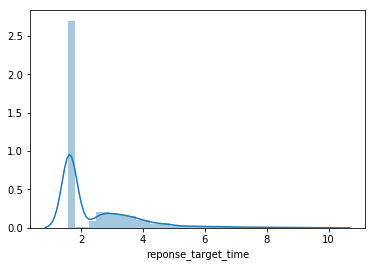

In [139]:
sns.distplot(df['reponse_target_time'])

### Functions

In [140]:
def circ_dist(a1,a2):
    ## Returns the minimal distance in angles between to angles 
    op1=abs(a2-a1)
    angs=[a1,a2]
    op2=min(angs)+(360-max(angs))
    options=[op1,op2]
    return min(options)


In [141]:
def cw_ccw_detector(target, NT):
    #print [target, NT,get_quadrant(target),get_quadrant(NT) ]
    #it returns the relative position of the target respect the NT
    if target<NT: 
        if circ_dist(target, NT)<180: o='cw'
        else: o='ccw'
    else:
        if circ_dist(target, NT)<180: o='ccw'
        else: o='cw'
        
    #Ecceptions
    if [get_quadrant(target),get_quadrant(NT) ] == [1,4] : o= 'ccw'
    if [get_quadrant(target),get_quadrant(NT) ] == [4,1] : o= 'cw'
    
    return o

In [142]:
def Interference_effects(target, response, reference):
    #input list of target, list of responses and list of references
    #Error_interference; positive for attraction and negative for repulsion
    #######
    #Decimals to get
    decimals=2
    ####
    interferences=[]
    for i in range(0, len(target)):
        angle_err_abs=abs(target[i] - response[i])
        if circ_dist(array(response)[i], array(reference)[i])<=circ_dist(array(target)[i], array(reference)[i]):
            Err_interference=round( angle_err_abs, decimals) 
        else:
            Err_interference=round( -angle_err_abs, decimals)

        interferences.append(Err_interference)
    
    return interferences

In [143]:
def f_cw_ccw_distance(df, error_column, orient_column):
        ##### if you want to split by delay, eccentricity, ... , you should use this function in 
        ##### subsets or put it in a loop foor where to append many means_cw_ccw
        means_cw_ccw={}
        for ori in ['cw', 'ccw']:
            mean = round(df.loc[ df[orient_column]==ori,  error_column].mean(), 3)
            means_cw_ccw[ori] = mean


        cw_ccw_distance=[]
        for i in df.index:
            or_ = df.loc[i, orient_column]
            if or_ == 'cw':
                or_cont = 'ccw'
            elif or_ =='ccw':
                or_cont = 'cw' 
            else:
                print('Error')
            idx =  or_cont
            #
            if or_ == 'ccw':
                cw_ccw_distance.append(df.loc[i, error_column] - means_cw_ccw[idx] )  
            elif or_ =='cw':
                cw_ccw_distance.append( means_cw_ccw[idx] - df.loc[i, error_column])  
            else:
                print('Error')
        
        
        ###
        return np.array(cw_ccw_distance)/2 

### Extra columns  
#### orient

In [144]:
cw_ccw = [cw_ccw_detector(df['A_T'].iloc[i], df['prev_response'].iloc[i]) for i in range(len(df)) ] #previous response is our distractor
df['orient'] = cw_ccw

#### distance

In [145]:
distance = [circ_dist(df['A_T'].iloc[i], df['prev_response'].iloc[i]) for i in range(len(df)) ] #previous response is our distractor
df['distance'] = distance

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


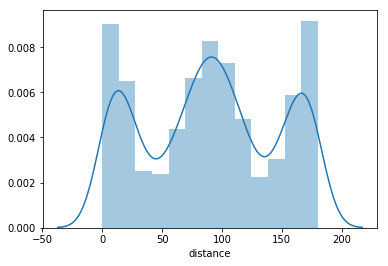

In [146]:
sns.distplot(df['distance'])
       
distance_cat = []
for i in range(len(df)):
    if df['distance'].iloc[i]<60:
        distance_cat.append('0-60')
    elif df['distance'].iloc[i]<120:
        distance_cat.append('60-120')
    else:
        distance_cat.append('120-180')


df['distance_cat'] = distance_cat
       
    
    

#### interference error

In [147]:
int_err = Interference_effects(df['A_T'], df['A_res'], df['prev_response'])
df['interference'] = int_err

#### A_err_distance

In [148]:
error_distance = f_cw_ccw_distance(df, 'A_err', 'orient')
df['A_err_distance'] = error_distance

In [149]:
df.head()

,level_0,index,A_T,A_res,prev_response,order,delay,subject,reponse_target_time,A_err,A_err_abs,orient,distance,distance_cat,interference,A_err_distance
0,0,1,290.0,290.0,149.0,1.0,1.0,1.0,1.642,0.0,0.0,ccw,141.0,120-180,0.0,1.058
1,1,3,315.0,302.0,51.0,1.0,7.0,1.0,1.644,13.0,13.0,cw,96.0,60-120,-13.0,-6.757
2,2,4,201.0,204.0,302.0,1.0,0.0,1.0,1.649,-3.0,3.0,cw,101.0,60-120,3.0,1.243
3,3,6,131.0,147.0,148.0,1.0,1.0,1.0,1.649,-16.0,16.0,cw,17.0,0-60,16.0,7.743
4,4,11,304.0,325.0,59.0,1.0,0.0,1.0,1.650,-21.0,21.0,cw,115.0,60-120,21.0,10.243


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Use

              Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   A_err_distance
No. Observations:   2538      Method:               REML          
No. Groups:         21        Scale:                26.7824       
Min. group size:    114       Likelihood:           -7775.9902    
Max. group size:    125       Converged:            No            
Mean group size:    120.9                                         
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                1.657    0.194  8.533 0.000  1.276  2.038
distance_cat[T.120-180] -1.373    0.267 -5.146 0.000 -1.896 -0.850
distance_cat[T.60-120]  -1.166    0.249 -4.685 0.000 -1.654 -0.678
Group Var                0.040    0.018                           



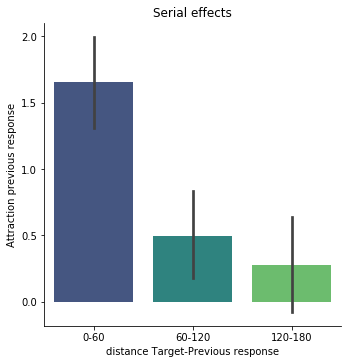

In [96]:
sns.factorplot(x='distance_cat', y='A_err_distance', data=df, kind='bar', palette='viridis', order=['0-60', '60-120', '120-180'])
plt.ylabel('Attraction previous response')
plt.xlabel('distance Target-Previous response')
plt.title('Serial effects')

res_m = smf.mixedlm(formula='A_err_distance ~ distance_cat', data=df, groups=df['subject']).fit()
print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimizat

            Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: A_err_distance
No. Observations:   2433    Method:             REML          
No. Groups:         21      Scale:              26.7570       
Min. group size:    101     Likelihood:         -7458.7084    
Max. group size:    125     Converged:          No            
Mean group size:    115.9                                     
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            1.355    0.285  4.749 0.000  0.796  1.914
distance            -0.008    0.002 -4.415 0.000 -0.012 -0.005
reponse_target_time  0.080    0.078  1.027 0.304 -0.072  0.232
Group Var            0.030    0.017                           



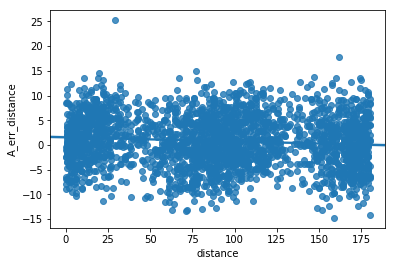

In [151]:
sns.regplot(x='distance', y='A_err_distance', data=df)
res_m = smf.mixedlm(formula='A_err_distance ~ distance + reponse_target_time', data=df, groups=df['subject']).fit()
print(res_m.summary())